In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("Iris.csv")
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
print(df.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [18]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:


# now preparing our model as per Gaussian Naive Bayesian


X = df.iloc[:,1:5] # X is the features in our dataset
y = df.iloc[:,-1]   # y is the Labels in our dataset

from sklearn.naive_bayes import GaussianNB

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 


In [24]:

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)

In [25]:


y_pred= model.predict(X_test) #now predicting our model to our test dataset


print(y)
print(y_pred)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object
['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'

In [26]:


from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)



0.96


Accuracy Score:
96.0


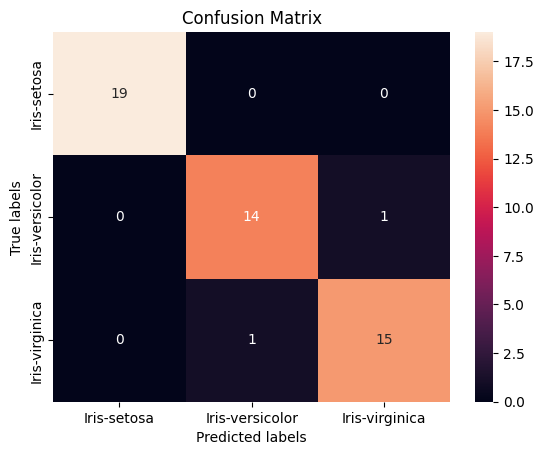

In [28]:

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

ax=plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);
ax.yaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']);

ac1 = accuracy_score(y_test, y_pred)*100
print('Accuracy Score:')
print(ac1)


In [ ]:
#For Setosa Class
tp=cm[0][0]
fn=(cm[0][1])+(cm[0][2])
tn=(cm[1][1])+(cm[1][2])+(cm[2][1])+(cm[2][2])
fp=(cm[1][0])+(cm[2][0])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )

true positive:  19
false positive:  0
true negative:  31
false negative:  0
error rate: 0.0


In [ ]:
#For Versicolor Class
tp=cm[1][1]
fn=(cm[1][0])+(cm[1][2])
tn=(cm[0][0])+(cm[0][2])+(cm[2][0])+(cm[2][2])
fp=(cm[0][1])+(cm[2][1])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )

true positive:  14
false positive:  1
true negative:  34
false negative:  1
error rate: 0.04


In [ ]:
#For Virginca Class
tp=cm[1][2]
fn=(cm[2][0])+(cm[2][1])
tn=(cm[0][0])+(cm[0][1])+(cm[1][0])+(cm[1][1])
fp=(cm[0][2])+(cm[1][2])
print('true positive: ',tp)
print('false positive: ',fp)
print('true negative: ',tn)
print('false negative: ',fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
print('error rate:', error_rate )

true positive:  1
false positive:  1
true negative:  33
false negative:  1
error rate: 0.05555555555555555


In [ ]:
from sklearn.metrics import classification_report
print('                        classification report:')
print('')
print(classification_report(y_test,y_pred))

                        classification report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.94      0.94      0.94        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

